# Figures 3 & 4: Profile Matches

This notebook will reproduce Figures 3 and 4 from *Heuristic Methods for Determining the Number of Classes in Unsupervised Classification of Climate Models*, E. Boland et al. 2022 (doi to follow). This requires the files data/\[ensemble member\]/\[nclass\]/avg.obj, created by running calculate_avgprofiles_78classes.ipynb.

Please attribute any plots or code from this notebook using the DOI from Zenodo: to come

Updated Nov 2022
E Atkinson & E Boland [emmomp@bas.ac.uk](email:emmomp@bas.ac.uk)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import os
import pickle

import cluster_utils as flt

### User options
Leave as is to recreate the paper

In [3]:
# Number of classes 
classes = [7,8]
ids = ['r1i1p1f2', 'r2i1p1f2']
levs=np.load('data/levs.npy', allow_pickle=True)

In [4]:
avg_profiles = {}
for m_id in ids:
    avg_profiles[m_id]={}
    for nn,n_classes in enumerate(classes):   
        print('Loading {}'.format(m_id))
        path_data = 'data/{}/{}'.format(m_id, n_classes)

        with open('{}/avg.obj'.format(path_data), 'rb') as file:
            avg_profiles[m_id][n_classes] = pickle.load(file)

    print('Done!')

Loading r1i1p1f2
Loading r1i1p1f2
Done!
Loading r2i1p1f2
Loading r2i1p1f2
Done!


### Match profiles for 7 and 8 classes

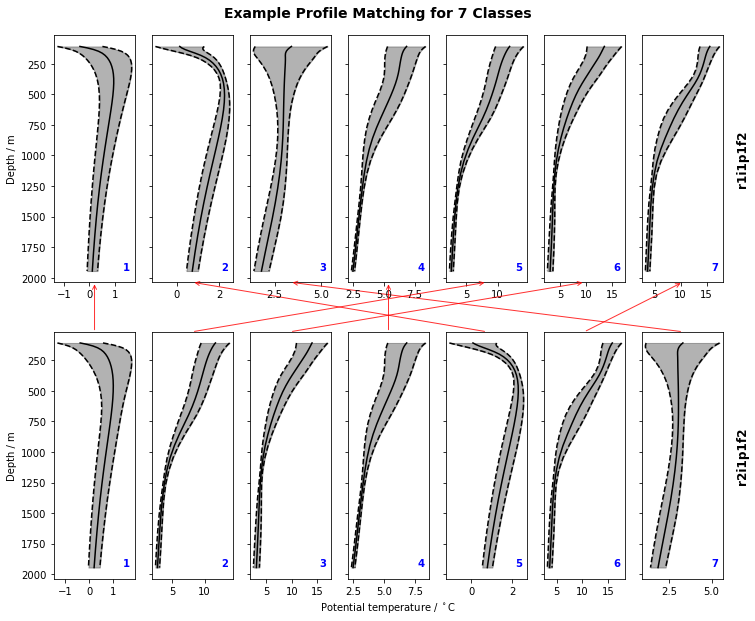

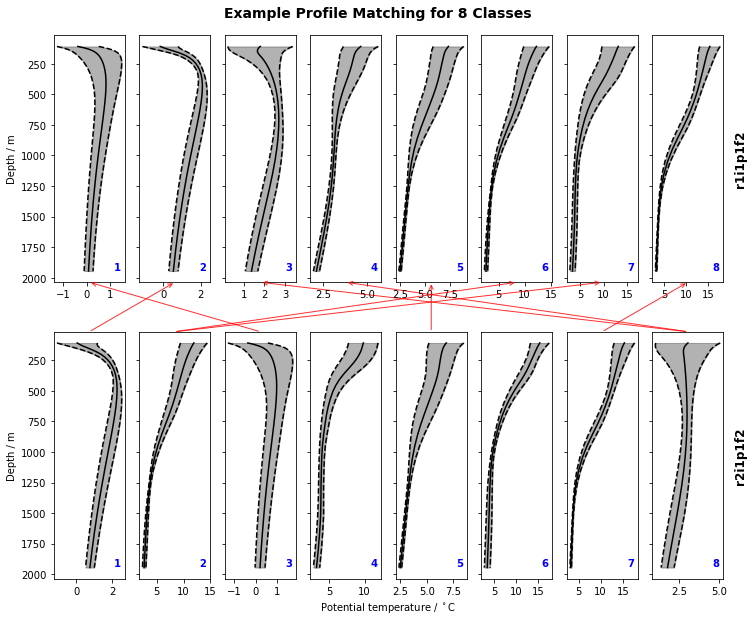

In [7]:
for n_classes in classes:

    figure, axes = plt.subplots(2, n_classes, sharey=True)
    filename='profilematching_{}classes'.format(n_classes)
    inds = flt.temp_sort(None, avg_profiles[ids[0]][n_classes], True)    
    g= flt.match_profiles([avg_profiles[ids[0]][n_classes][i] for i in inds], avg_profiles[ids[1]][ n_classes])

    for (im, m_id) in enumerate(ids):        
        
        for (i, ax) in enumerate(axes[im]):
            if i == 0:
                ax.set_ylabel('Depth / m')
                if im ==1:
                    ax.invert_yaxis()
            if i == n_classes-1:
                ax.annotate(m_id,xy=(1.15,0.5),xycoords=ax.transAxes,fontsize=12,fontweight='bold',\
                             rotation='vertical',va='center')
            ax.text(0.85,0.05,str(i+1),fontweight='bold',fontsize=10,color='b',transform=ax.transAxes)
            
            if im ==0:
                k=inds[i]
            else:
                k=i
            ax.plot(avg_profiles[m_id][n_classes][k]['mean'], levs, c='black')
            x2 = avg_profiles[m_id][n_classes][k]['mean'] + avg_profiles[m_id][n_classes][k]['std']
            x1 = avg_profiles[m_id][n_classes][k]['mean'] - avg_profiles[m_id][n_classes][k]['std']
            ax.plot(x2, levs, c='black', ls='--')
            ax.plot(x1, levs, c='black', ls='--')
            ax.fill_betweenx(levs, x1, x2, color='black', alpha=0.3)

            if im==0:
                ax.annotate("",xy=(0.5,0),xytext=(0.5+1.2*(g[i]-i),-0.2),xycoords=ax.transAxes, \
                           arrowprops=dict(arrowstyle="->",color='r',alpha=0.8))
                        
    figure.add_subplot(111, frameon=False)
    plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
    plt.xlabel('Potential temperature / ${}^\circ$C')

    plt.suptitle('Example Profile Matching for {} Classes'.format(n_classes),fontsize=14,fontweight='bold',y=0.92)

    figure.set_size_inches(12, 10)

    plt.savefig('figures/{}'.format(filename), dpi=300, bbox_inches='tight')